# Análisis de propuestas para "La Estrategia Operativa 2021"

## Descripción breve:

Anális de la vialidad de 3 opciones de enfoque: rutas de importación y exportación, medio de transporte utilizado y valor total de las importaciones y exportaciones, identificar cuál(es) es la mejor opción para la empresa.

## Proyecto 2. Introducción al análisis de datos. José Antonio Hernández Mondragón

## Introducción.

### Objetivo.

Poner en práctica las herramientas esenciales de Python para el análisis de datos a partir de la clasificación y manejo de los mismos, mediante la creación y el uso de archivos y estructuras de datos, implementación y creación de funciones, uso de módulos importados y destructuring.

### Descripción del caso.

Synergy Logistics es una empresa dedicada a la intermediación de servicios deimportación y exportación de diferentes productos. Actualmente la empresa cuenta con una base de datos que refleja las rutas más importantes que opera desde el año 2015, con su respectivo origen y destino, año, producto, modo de transporte y valor total.

Realizar una propuesta que permita enfocar las prioridades de la estrategia operativa 2021; para ello, se plantea analizar la viabilidad de 3 opciones de enfoque: rutas de importación y exportación, medio de transporte utilizado y valor total de importaciones y exportaciones:

+ **Opción 1) Rutas de importación y exportación.** Synergy logistics está considerando la posibilidad de enfocar sus esfuerzos en las 10 rutas más demandadas. Acorde a los flujos de importación y exportación, ¿cuáles son esas 10 rutas? ¿le conviene implementar esa estrategia? ¿por qué?

+ **Opción 2) Medio de transporte utilizado.** ¿Cuáles son los 3 medios de transporte más importantes para Synergy logistics considerando el valor de las importaciones y exportaciones? ¿Cuál es medio de transporte que podrían reducir?

+ **Opción 3) Valor total de importaciones y exportaciones.** Si Synergy Logistics quisiera enfocarse en los países que le generan el 80% del valor de las exportaciones e importaciones ¿en qué grupo de países debería enfocar sus esfuerzos?

La herramienta, los datos y el reporte está en el siguiente repositorio Gthub.

### Repositorio de Github.

https://github.com/JAHM11/Proyecto-1-EMTECH-Hernandez_Mondragon_Jose_Antonio.git


## Desarrollo del análisis.


In [97]:
# Importación de las librerias necesarias para el análisis de las 3 opciones.

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

filepath = 'synergy_logistics_database.csv'

datos = pd.read_csv(filepath, index_col="register_id")


In [98]:
# Visualizamos los datos que nos brinda el archivo .csv

datos.head()

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


In [99]:
# Vizualizamos los ultimos datos de la base de datos.

datos.tail()

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
19052,Imports,Japan,Singapore,2020,27/06/20,Gas turbines,Sea,Union Energy Co,1000000
19053,Imports,Malaysia,Singapore,2020,28/06/20,Gas turbines,Sea,Union Energy Co,2000000
19054,Imports,Malaysia,Singapore,2020,29/06/20,Gas turbines,Sea,Union Energy Co,33000000
19055,Imports,Malaysia,Singapore,2020,30/06/20,Gas turbines,Sea,Union Energy Co,13000000
19056,Imports,Malaysia,Singapore,2020,01/07/20,Gas turbines,Sea,Union Energy Co,30000000


In [100]:
# Obtenemos la información de cada una de las columnas.

datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19056 entries, 1 to 19056
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   direction       19056 non-null  object
 1   origin          19056 non-null  object
 2   destination     19056 non-null  object
 3   year            19056 non-null  int64 
 4   date            19056 non-null  object
 5   product         19056 non-null  object
 6   transport_mode  19056 non-null  object
 7   company_name    19056 non-null  object
 8   total_value     19056 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.5+ MB


### Opción 1) Rutas de importación y exportación.

Vamos a analizar la primera opción, para eso dividiremos el análisis en las 10 rutas de importación más importantes y las 10 rutas de exportación más importantes acordes a el valor total que genera cada una.

#### Análisis de Importaciones

10 Importaciones más usadas por valor total y 10 Importaciones menos usadas por valor total.
En esta sección se analizara las importaciones ordenandolas por las más importantes para la empresa y la menos importantes.

In [101]:
# Vamos a obtener los datos de las importaciones para poder hacer su análisis de rutas más y menos usadas.

importaciones = datos[datos.direction == "Imports"]
importaciones_totales = pd.DataFrame(importaciones.groupby(by = ["origin", "destination"]).sum())
importaciones_totales = importaciones_totales.drop(['year'], axis=1)
importaciones_totales


total_value
origin               destination                      
Australia            Japan                   920000000
Brazil               China                   413000000
                     Germany                  76000000
Canada               USA                     569000000
China                Japan                  3237000000
                     Mexico                  244000000
                     Singapore              1267000000
                     Thailand               3831000000
                     USA                     297000000
                     United Arab Emirates   3357000000
France               Germany                 286000000
                     Poland                 1030000000
Germany              China                  1328000000
                     India                   548000000
                     Mexico                 1804000000
                     Poland                  570000000
Italy                Mexico                  680000000
                     Poland                  588000000
Japan                Canada                  278000000
                     India                   115000000
                     Mexico                 3918000000
                     Singapore               171000000
                     Thailand                847000000
                     USA                     527000000
                     United Arab Emirates   2238000000
Malaysia             Singapore                78000000
                     Thailand               3482000000
Mexico               Canada                  178000000
                     China                   590000000
                     Germany                 345000000
                     Japan                  1143000000
                     USA                    2365000000
Russia               India                   851000000
Singapore            Thailand               4017000000
South Korea          Germany                 738000000
                     Japan                   147000000
                     Mexico                 1291000000
                     United Arab Emirates   1713000000
Spain                Germany                2044000000
                     Mexico                  957000000
USA                  Canada                  348000000
                     China                   241000000
                     Germany                1620000000
                     India                  1133000000
                     Japan                   381000000
                     Thailand               1568000000
United Arab Emirates India                   371000000
United Kingdom       Canada                  248000000
Vietnam              United Arab Emirates    540000000

In [102]:
# Obtenemos las 10 rutas más usadas en las importaciones.

importaciones_totales = importaciones_totales.sort_values('total_value',ascending=False)
importaciones_totales_max = importaciones_totales.head(10)
importaciones_totales_max

total_value
origin    destination                      
Singapore Thailand               4017000000
Japan     Mexico                 3918000000
China     Thailand               3831000000
Malaysia  Thailand               3482000000
China     United Arab Emirates   3357000000
          Japan                  3237000000
Mexico    USA                    2365000000
Japan     United Arab Emirates   2238000000
Spain     Germany                2044000000
Germany   Mexico                 1804000000

In [103]:
# Obtenemos las 10 rutas menos usadas en las importaciones.

importaciones_totales = importaciones_totales.sort_values('total_value')
importaciones_totales_min = importaciones_totales.head(10)
importaciones_totales_min

,,total_value
origin,destination,
Brazil,Germany,76000000
Malaysia,Singapore,78000000
Japan,India,115000000
South Korea,Japan,147000000
Japan,Singapore,171000000
Mexico,Canada,178000000
USA,China,241000000
China,Mexico,244000000
United Kingdom,Canada,248000000


De la sección de importaciones podemos definir que las rutas más importantes en importaciones y menos importantes:

**Importaciones más importantes:**

1. Singapore - Thailand
2. Japan - Mexico
3. China - Thailand
4. Malaysia - Thailand
5. China - United Arab Emirates
6. China - Japan	
7. Mexico - USA
8. Japan - United Arab Emirates
9. Spain - Germany
10. Germany - Mexico

**Importaciones menos importantes:**

1. Brazil- Germany
2. Malaysia - Singapore
3. Japan - India
4. South Korea - Japan
5. Japan - Singapore
6. Mexico - Canada
7. USA - China
8. China - Mexico
9. United Kingdom - Canada
10. Japan - Canada

#### Análisis de Exportaciones

10 Exportaciones más usadas por valor total y 10 Exportaciones menos usadas por valor total.
En esta sección se analizara las exportaciones ordenandolas por las más importantes para la empresa y la menos importantes.

In [104]:
# Vamos a obtener los datos de las exportaciones para poder hacer su análisis de rutas más y menos usadas.

exportaciones = datos[datos.direction == "Exports"]
exportaciones_totales = pd.DataFrame(exportaciones.groupby(by = ["origin", "destination"]).sum())
exportaciones_totales = exportaciones_totales.drop(['year'], axis=1)
exportaciones_totales

total_value
origin         destination             
Australia      Brazil         172000000
               Mexico          84000000
               Philippines    344000000
               Singapore      493000000
               Thailand       337000000
...                                 ...
United Kingdom France            107000
               Ireland        584123000
               Italy              77000
               Spain         1378025000
               USA               111000

[144 rows x 1 columns]

In [105]:
# Obtenemos las 10 rutas más usadas en las exportaciones.

exportaciones_totales = exportaciones_totales.sort_values('total_value',ascending=False)
exportaciones_totales_max = exportaciones_totales.head(10)
exportaciones_totales_max

total_value
origin      destination                
China       Mexico          12250000000
Canada      Mexico           8450000000
South Korea Vietnam          6877007000
France      Belgium          5538069000
            United Kingdom   5427000000
China       South Korea      4790000000
USA         Mexico           4710000000
South Korea Japan            4594000000
Germany     Italy            4541000000
China       Germany          4090000000

In [106]:
# Obtenemos las 10 rutas menos usadas en las exportaciones.

exportaciones_totales = exportaciones_totales.sort_values('total_value')
exportaciones_totales_min = exportaciones_totales.head(10)
exportaciones_totales_min

total_value
origin      destination             
France      Austria             7000
            Netherlands        14000
            Russia             20000
Netherlands Mexico             28000
            Argentina          36000
Italy       Netherlands        38000
            Russia             40000
            Singapore          45000
France      China              54000
Netherlands Brazil             59000

De la sección de exportaciones podemos definir que las rutas más importantes en exportaciones y menos importantes:

**Exportaciones más importantes:**

1. China - México
2. Canada - México
3. South Korea - Vietnam	
4. France - Belgium
5. France - United Kingdom
6. China - South Korea
7. USA - Mexico
8. South Korea - Japan
9. Germany - Italy
10. China - Germany	

**Exportaciones menos importantes:**

1. France - Austria	
2. France - Netherlands
3. France - Russia
4. Netherlands - Mexico
5. Netherlands - Argentina
6. Italy - Netherlands
7. Italy - Russia
8. Italy - Singapore
9. France - China
10. Netherlands - Brazil



Se logro el objetivo de analizar las rutas más importantes en exportaciones e importaciones y las menos importantes para exportaciones e importaciones.

### Opción 2) Medio de transporte utilizado. 

¿Cuáles son los 3 medios de transporte más importantes para Synergy logistics considerando el valor de las importaciones y exportaciones? ¿Cuál es medio de transporte que podrían reducir?

In [107]:
# Visualizamos los datos que vamos a ocupar para el analisis

datos.head()

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


<Figure size 1152x432 with 0 Axes>

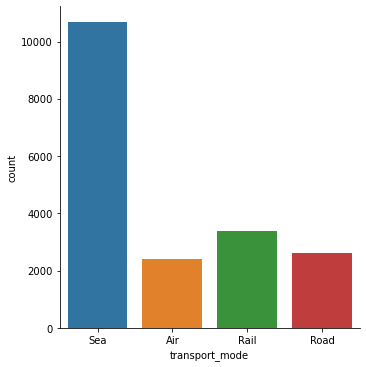

In [108]:
# Estableces el ancho y alto de la figura

plt.figure(figsize=(16,6))

# Gráfico para los tipos de transporte respecto a cuantas veces aparece en los datos.

sns.catplot(x='transport_mode', data = datos,kind='count')

En esta gráfica obtenemos las veces que se utilizó cada uno de los modos de tranporte que existe: Sea, Air, Rail y Road. 
El más usado es Sea y el menos es Air pero sin verse mucha diferencia este con los otros dos.

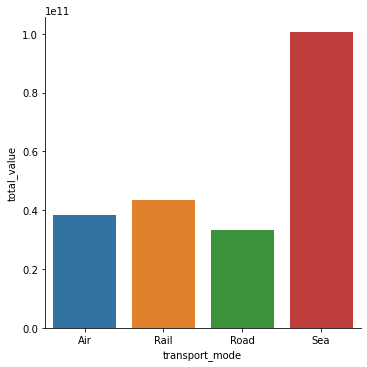

In [109]:
# Graficamos los modos de transportes por la suma de valor total

transporte_totales = pd.DataFrame(datos.groupby('transport_mode')['total_value'].sum())
transporte_totales.reset_index(level=0,inplace=True)
transporte_totales

sns.catplot(x='transport_mode', y='total_value', data = transporte_totales , kind = 'bar')



En esta gráfica obtenemos la suma de valor total que genero cada uno de los modos de tranporte que existe: Sea, Air, Rail y Road. El que genero más valor fue como se esperaba es Sea y el menos es Road y aqui es una sorpresa porque el que menos se usaba era Air, aunque como anteriormente no existe mucha diferencia de este con los otros dos.

<AxesSubplot:ylabel='total_value'>

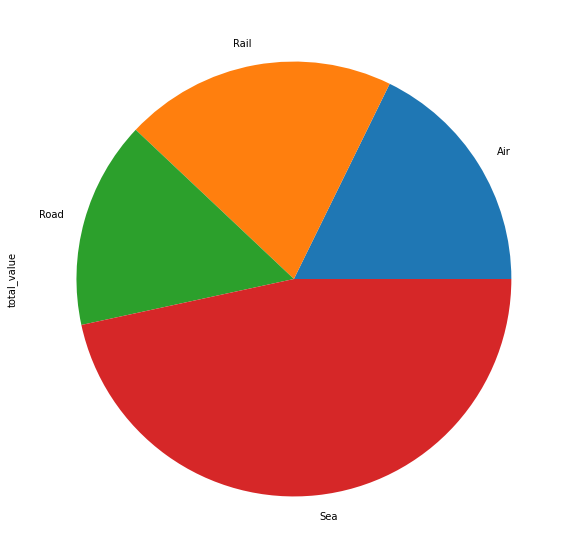

In [110]:
# Grafica de pastel

plt.figure(figsize=(15,10))
datos.groupby('transport_mode')['total_value'].sum().plot(kind = "pie")

En la gráfica de pastel es evidente que cada medio de transporte es importante para la compañia y podemos decir que esta opción no seria viable y traería perdidas.

### Opción 3) Valor total de importaciones y exportaciones. 

Si Synergy Logistics quisiera enfocarse en los países que le generan el 80% del valor de las exportaciones e importaciones ¿en qué grupo de países debería enfocar sus esfuerzos?

Para esto vamos a analizar los países de origen, tanto en importaciones como exportaciones para obtener el valor total de importaciones y exportaciones y obtener los paises que generan el 80% de ganancias.

In [111]:
# Creamos el dataframe que contenga los paises de origen de importaciones e exportaciones y ordenamos de mayor a menor.

totales_pais = pd.DataFrame(datos.groupby("origin")['total_value'].sum())
totales_pais = totales_pais.sort_values('total_value',ascending=False)
totales_pais.reset_index(level=0,inplace=True)
totales_pais


,origin,total_value
0,China,45210046000
1,USA,23646306000
2,Japan,20042976000
3,France,19930332000
4,South Korea,18510146000
5,Germany,15593233000
6,Russia,14074000000
7,Canada,11253000000
8,Italy,6634684000
9,Spain,6419000000


In [112]:
# Hacemos el procentaje de que países empezando de mayor a menor genera el 80%

total_paises_80 = pd.DataFrame(columns=['origin', 'total_value'])
total = totales_pais["total_value"].sum()
total_pais = 0
porcentaje = 0

for i, columna in totales_pais.iterrows(): 
    if porcentaje <= 0.80:
        total_pais += columna["total_value"]
        porcentaje = total_pais/total 
        total_paises_80 = df = total_paises_80.append({'origin': columna["origin"], 'total_value': columna["total_value"]}, ignore_index=True) 

total_paises_80

,origin,total_value
0,China,45210046000
1,USA,23646306000
2,Japan,20042976000
3,France,19930332000
4,South Korea,18510146000
5,Germany,15593233000
6,Russia,14074000000
7,Canada,11253000000
8,Italy,6634684000


In [113]:
# analizamos la concentración al 90%

total_paises_80 = pd.DataFrame(columns=['origin', 'total_value'])
total = totales_pais["total_value"].sum()
total_pais = 0
porcentaje = 0

for i, columna in totales_pais.iterrows(): 
    if porcentaje <= 0.90:
        total_pais += columna["total_value"]
        porcentaje = total_pais/total 
        total_paises_80 = df = total_paises_80.append({'origin': columna["origin"], 'total_value': columna["total_value"]}, ignore_index=True) 

total_paises_80

,origin,total_value
0,China,45210046000
1,USA,23646306000
2,Japan,20042976000
3,France,19930332000
4,South Korea,18510146000
5,Germany,15593233000
6,Russia,14074000000
7,Canada,11253000000
8,Italy,6634684000
9,Spain,6419000000


<AxesSubplot:ylabel='total_value'>

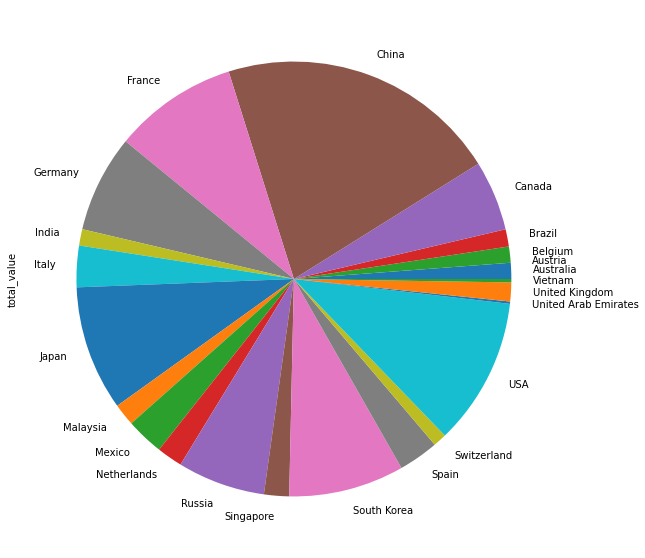

In [114]:
# Comprobamos esto con una grafica de pastel

plt.figure(figsize=(15,10))
totales_pais.groupby('origin')['total_value'].sum().plot(kind = "pie")

La grafica anterior confirma los 8 paises en donde se concentra el 80% importaciones y exportaciones son:

+ China
+ USA	
+ Japan	
+ France	
+ South Korea	
+ Germany	
+ Russia	
+ Canada	
+ Italy	

Estos 8 paises son los que más area tienen en el grafico.

## Conclusiones

En conclusión y conforme a los datos obtenidos en el análisis de cada una de las opcione, en la tercera opción que es enfocarse en los países que le generan el 80% del valor de las exportaciones e importaciones a la empresa nos damos cuenta que de la primera opción seria un desperdicio darle más enfoque en las rutas más usadas pues unas de estas aunque son muy grandes en el valor total el país de origen en muchos casos son de los que no estan dentro de donde se genera 80% de las importaciones o exportaciones, ejemplo es Singapore - Thailand aunque es una de las rutas que tuvo más valor total de importaciones, esta en el lugar 12 de paises más importantes en importaciones y exportaciones, támbien en la gráfica es posible apreciar su nivel.

La opción 2, como lo vimos en su apartado los 4 metodos de transporte estan casi balanceado en su uso y valor total, por lo cual seria un error quitar uno de ellos.

Por lo tanto, lo mejor sería enfocarse en 8 países que generan el 80% de las importaciones y exportaciones, y al visualizar el 90% de concentración vemos que llegamos a 12 paises lo que nos dice que esos 8 países en promedio generan 10% de concentración a diferencia de los 4 ultimos que en promedio generan 2.5% para llegar a 90%.